In [1]:
import numpy as np
import phate
import pandas as pd

In [2]:
def make_swiss_roll(turns=2, a=0.1, base_delta_theta=0.1 * 2 * np.pi, theta=1 * np.pi, noise=0.0):
    thetas = []
    while theta < 2 * np.pi * turns:
        thetas.append(theta)
        # Adjust delta_theta to be inversely proportional to theta, but ensure it's never zero
        delta_theta = base_delta_theta / (1 + theta / (2 * np.pi))
        theta += delta_theta
    thetas = np.array(thetas)
    tmp_x = (a * thetas * np.cos(thetas))
    xmin, xmax = np.min(tmp_x), np.max(tmp_x)
    w = np.linspace(xmin, xmax, len(thetas))
    t, w = np.meshgrid(thetas, w)
    t = t.flatten()
    w = w.flatten()
    x = a * t * np.cos(t)
    y = a * t * np.sin(t)
    z = w
    noises_t = np.random.normal(0, noise * (t.max()-t.min()), len(t))
    noises_w = np.random.normal(0, noise * (w.max()-w.min()), len(w))
    t += noises_t
    w += noises_w
    return np.column_stack((x, y, z)), np.column_stack((t, w))


In [3]:
Xs, thetas = make_swiss_roll(turns=2, a=0.1, base_delta_theta=0.1 * 2 * np.pi, theta=1.5 * np.pi, noise=0.)
ambient_noise = np.random.normal(0, 0.05, size=Xs.shape)
Xs += ambient_noise

In [4]:
phate_op = phate.PHATE()
X_phate = phate_op.fit_transform(Xs)

Calculating PHATE...
  Running PHATE on 900 observations and 3 variables.
  Calculating graph and diffusion operator...
    Calculating KNN search...
    Calculating affinities...
    Calculated affinities in 0.02 seconds.
  Calculated graph and diffusion operator in 0.04 seconds.
  Calculating optimal t...
    Automatically selected t = 30
  Calculated optimal t in 0.56 seconds.
  Calculating diffusion potential...
  Calculated diffusion potential in 0.27 seconds.
  Calculating metric MDS...
  Calculated metric MDS in 0.84 seconds.
Calculated PHATE in 1.74 seconds.


In [5]:
np.save(f"../data/swiss_roll.npy", Xs)
np.save(f"../data/swiss_roll_phate.npy", X_phate)

In [6]:
thetas.shape

(900, 2)

In [7]:
Xs.shape

(900, 3)

<Axes: xlabel='PHATE1', ylabel='PHATE2'>

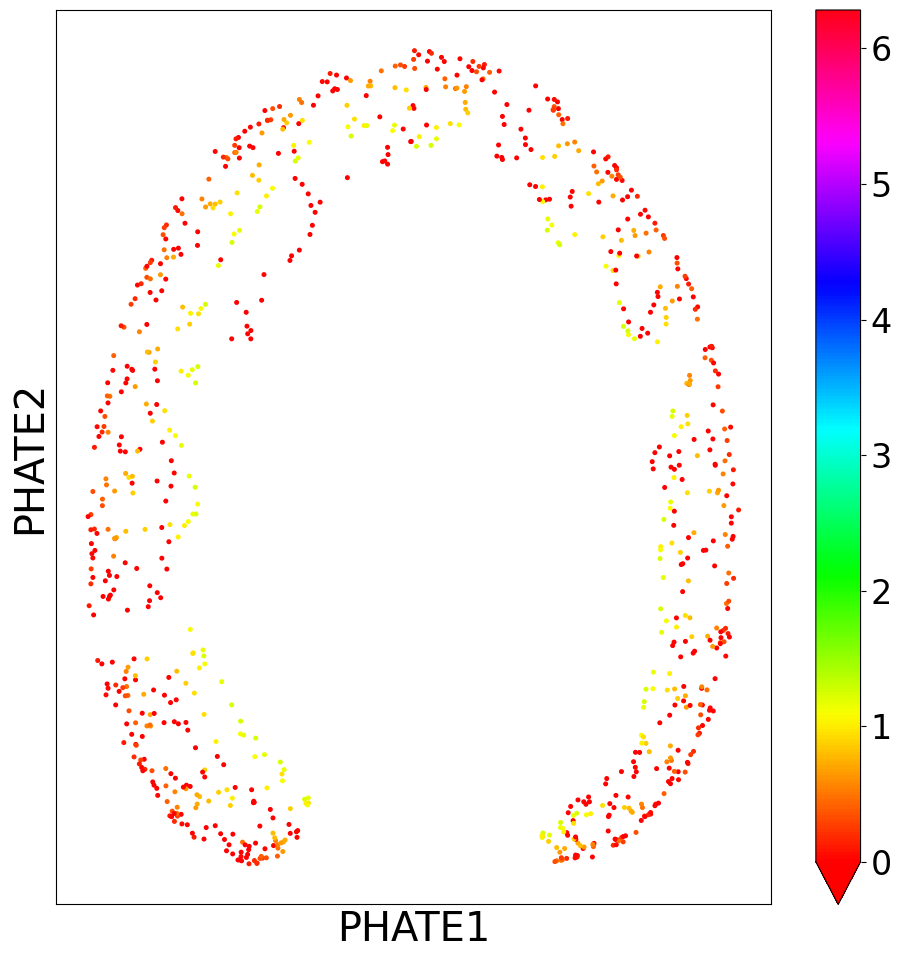

In [8]:
import scprep
scprep.plot.scatter2d(X_phate, c=thetas[:,1], cmap="hsv", figsize=(10, 10), ticks=False, label_prefix="PHATE", legend_anchor=(1, 1), fontsize=20, vmin=0, vmax=2*np.pi)

In [9]:
color_df = pd.DataFrame(thetas[:,1])
color_df.to_csv("../data/swiss_roll_color.csv")

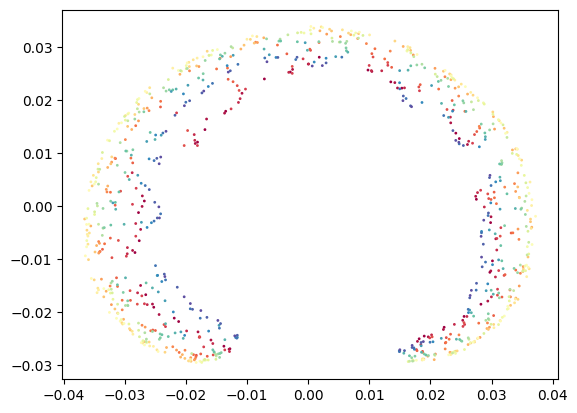

In [10]:
import matplotlib.pyplot as plt
plt.scatter(X_phate[:,0], X_phate[:,1], c=color_df, cmap='Spectral', s=1)

In [11]:
color_df

,0
0,-0.946832
1,-0.946832
2,-0.946832
3,-0.946832
4,-0.946832
...,...
895,1.243078
896,1.243078
897,1.243078
898,1.243078


/tmp/ipykernel_486707/2616938977.py:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_phate[:,0], X_phate[:,1], c='b', cmap='Spectral', s=1)


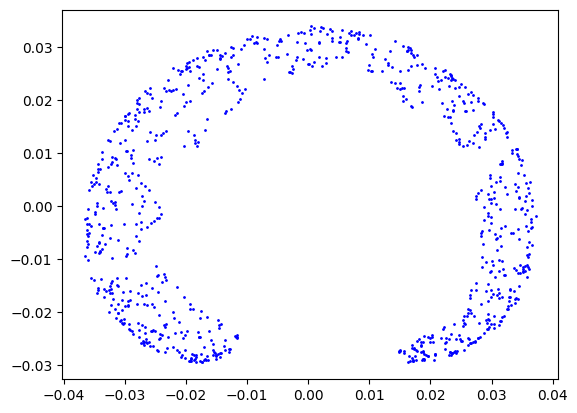

In [12]:
plt.scatter(X_phate[:,0], X_phate[:,1], c='b', cmap='Spectral', s=1)